# Salary Analysis of Data Scientists and Data Analysts 2024

## Libraries and importing data

In [19]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = '/data_science_salaries.csv'
data = pd.read_csv(path)
df = data.copy()

## General look

In [6]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,11087.0,2022.848381,0.567803,2020.0,2023.0,2023.0,2023.0,2024.0
salary,11087.0,169572.298999,408031.147079,14000.0,105000.0,142200.0,188050.0,30400000.0
salary_in_usd,11087.0,149614.977631,66704.329347,15000.0,104000.0,142000.0,185900.0,750000.0


In [9]:
df.job_title.value_counts(1)

Data Engineer                0.226030
Data Scientist               0.206909
Data Analyst                 0.148823
Machine Learning Engineer    0.105168
Research Scientist           0.031118
                               ...   
Consultant Data Engineer     0.000090
Deep Learning Researcher     0.000090
Power BI Developer           0.000090
BI Data Engineer             0.000090
Sales Data Analyst           0.000090
Name: job_title, Length: 132, dtype: float64

In [15]:
df.experience_level.value_counts()

Senior-level       7663
Mid-level          2404
Entry-level         704
Executive-level     316
Name: experience_level, dtype: int64

In [60]:
df.company_location.value_counts()

United States             9637
United Kingdom             513
Canada                     276
Spain                      119
Germany                     79
                          ... 
Armenia                      1
Bosnia and Herzegovina       1
Qatar                        1
Ecuador                      1
Honduras                     1
Name: company_location, Length: 75, dtype: int64

## Data Scientists & Data Analysts

In [18]:
# Let's create a separate df for each and take a look

data_scientist = df[df['job_title'] == 'Data Scientist']
entry_level_ds = data_scientist[data_scientist['experience_level'] == 'Entry-level']

data_analyst = df[df['job_title'] == 'Data Analyst']
entry_level_da = data_analyst[df['experience_level'] == 'Entry-level']

<ipython-input-18-8fc6f05ceca7>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  entry_level_da = data_analyst[df['experience_level'] == 'Entry-level']


In [20]:
data_scientist.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
12,Data Scientist,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
13,Data Scientist,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
16,Data Scientist,Mid-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium


In [78]:
data_analyst.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
24,Data Analyst,Entry-level,Full-time,On-site,2024,United States,115000,USD,115000,United States,Medium
25,Data Analyst,Entry-level,Full-time,On-site,2024,United States,85000,USD,85000,United States,Medium
34,Data Analyst,Entry-level,Full-time,On-site,2024,United States,195500,USD,195500,United States,Medium
35,Data Analyst,Entry-level,Full-time,On-site,2024,United States,68000,USD,68000,United States,Medium
52,Data Analyst,Senior-level,Full-time,On-site,2024,United States,175520,USD,175520,United States,Medium


## Salaries of DS vs DA in the world

### General salaries:

In [36]:
data_scientist.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,2294.0,2022.812990,0.587251,2020.0,2023.00,2023.0,2023.0,2024.0
salary,2294.0,189593.561029,708794.897067,16000.0,120000.00,154000.0,190150.0,30400000.0
salary_in_usd,2294.0,155363.591107,62286.805481,16000.0,119094.25,153000.0,190000.0,750000.0


In [37]:
data_analyst.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,1650.0,2022.853333,0.527306,2020.0,2023.0,2023.0,2023.0,2024.0
salary,1650.0,110467.220606,73240.968305,15000.0,78000.0,105000.0,134500.0,1700000.0
salary_in_usd,1650.0,108152.071515,42905.647436,15000.0,79000.0,105000.0,134200.0,430967.0


- The variance of these 2 is not that different.
- Average salary of a DS is ~155k compared to a DA of ~108k.
- There's around a $50k difference of salaries in each percentile.
- Both have almost the same minimum value, but the max value of DS is close to 2x DA.

### Salaries by location

In [74]:
data_scientist.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

company_location
United States     165011.963563
New Zealand       164951.500000
Canada            160475.116883
Australia         121838.666667
Switzerland       121520.000000
Israel            119059.000000
Ireland           107744.800000
United Kingdom    105756.095238
Algeria           100000.000000
Norway             88462.000000
Netherlands        79661.714286
Austria            76352.000000
Portugal           72221.500000
Belgium            68030.500000
Germany            66237.666667
Hong Kong          65058.000000
Estonia            63701.000000
Luxembourg         62726.000000
Latvia             58788.250000
France             57864.733333
Romania            53984.000000
Indonesia          53416.000000
Brazil             52636.666667
Andorra            50745.000000
Nigeria            50000.000000
Spain              44734.285714
Chile              40038.000000
Malaysia           40000.000000
Poland             34266.500000
Mexico             30000.000000
India              2969

In [75]:
data_analyst.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

company_location
United States               112477.409248
Canada                      105738.787879
Australia                   101632.666667
Poland                       95000.000000
Croatia                      92280.000000
United Kingdom               82492.028571
Colombia                     72000.000000
Singapore                    65257.000000
Philippines                  57670.000000
Germany                      53304.750000
Argentina                    50000.000000
Central African Republic     49216.000000
Estonia                      45130.333333
Spain                        44949.187500
France                       44743.000000
Slovenia                     42647.000000
Portugal                     38193.666667
Greece                       31182.000000
India                        20309.200000
Indonesia                    15000.000000
Name: salary_in_usd, dtype: float64

- Some of the best countries in terms of USD salary are: United Sates, Canada, New Zealand, and Australia.

### Entry-level Salaries:

In [38]:
entry_level_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,109.0,2022.403670,0.861945,2020.0,2022.0,2023.0,2023.0,2023.0
salary,109.0,216050.908257,706875.849670,16000.0,58400.0,100000.0,130000.0,6600000.0
salary_in_usd,109.0,85719.550459,43314.948584,16000.0,50000.0,80000.0,119200.0,190000.0


In [39]:
entry_level_da.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,226.0,2022.995575,0.721097,2020.0,2023.0,2023.0,2023.00,2024.0
salary,226.0,84665.132743,113412.957098,15000.0,52450.0,75000.0,94600.00,1700000.0
salary_in_usd,226.0,78215.681416,34449.809370,15000.0,52450.0,75000.0,94458.75,203000.0


- Average salary of an entry level DS is ~85k compared to ~78k of a DA. The difference is smaller than expected; based on some news that promote DS jobs, entry level salary is closer to 100k.
- Min and standard deviation are again similar, DS being a little higher.
- Overall, seems that for an entry level job, DS and DA can expect a similar salary, even across most percentiles.

### Graphs

Career progression of a DS

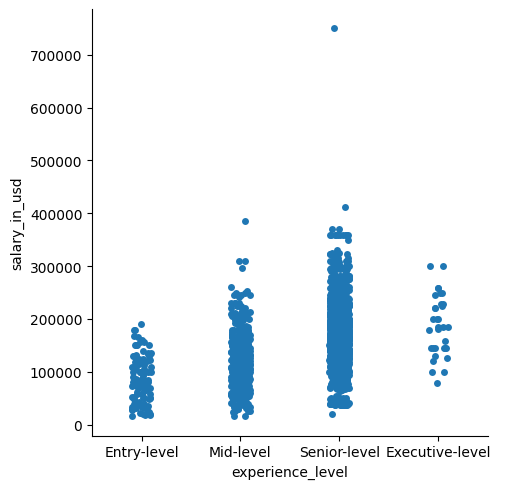

In [59]:
sns.catplot(data=data_scientist, y='salary_in_usd', x='experience_level', order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.show()

Career progression of a DA

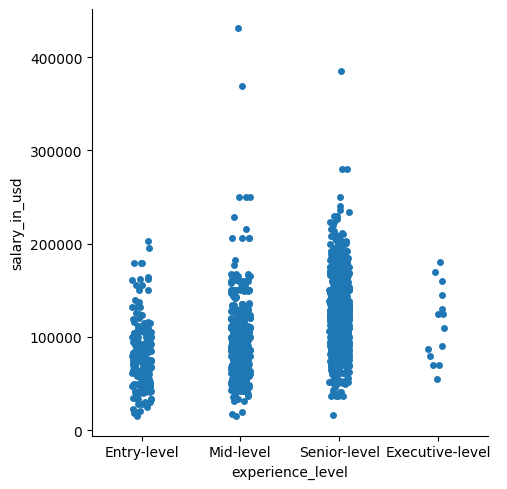

In [58]:
sns.catplot(data=data_analyst, y='salary_in_usd', x='experience_level', order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.show()

- Based on these, an increase in experience level seems to positively correlate with a higher salary, but the increment is not that clear.

**The analysis should be done distinguishing between countries to keep salaries consistent.**

## DS and DA in the United States

In [61]:
us_data_scientist = data_scientist[data_scientist['company_location'] == 'United States']
us_entry_level_ds = us_data_scientist[us_data_scientist['experience_level'] == 'Entry-level']

us_data_analyst = data_analyst[data_analyst['company_location'] == 'United States']
us_entry_level_da = us_data_analyst[us_data_analyst['experience_level'] == 'Entry-level']

DS and DA in the United States

In [62]:
us_data_scientist.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,1976.0,2022.856275,0.517630,2020.0,2023.0,2023.0,2023.0,2024.0
salary,1976.0,166241.860830,77174.905630,24000.0,130000.0,160000.0,195000.0,2500000.0
salary_in_usd,1976.0,165011.963563,56586.929118,24000.0,129825.0,159950.0,195000.0,750000.0


In [63]:
us_data_analyst.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,1449.0,2022.869565,0.504365,2020.0,2023.0,2023.0,2023.0,2024.0
salary,1449.0,112462.737060,39880.467662,20000.0,83300.0,107500.0,136600.0,385000.0
salary_in_usd,1449.0,112477.409248,39856.590364,20000.0,83300.0,107500.0,136600.0,385000.0


in the United States, average salary of a DS is ~166k compared to ~112k of a DA.

In [65]:
us_entry_level_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,70.0,2022.614286,0.687209,2020.0,2022.0,2023.0,2023.00,2023.0
salary,70.0,104304.985714,36301.696131,24000.0,74540.0,100000.0,130000.75,190000.0
salary_in_usd,70.0,104304.985714,36301.696131,24000.0,74540.0,100000.0,130000.75,190000.0


In [64]:
us_entry_level_da.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,184.0,2023.065217,0.674344,2020.0,2023.0,2023.0,2023.0,2024.0
salary,184.0,84851.266304,33658.742144,20000.0,60000.0,80000.0,100000.0,203000.0
salary_in_usd,184.0,84966.809783,33529.836556,20000.0,60000.0,80000.0,100000.0,203000.0


in the United States, average salary of an entry level DS is ~104k compared to ~85k of a DA.

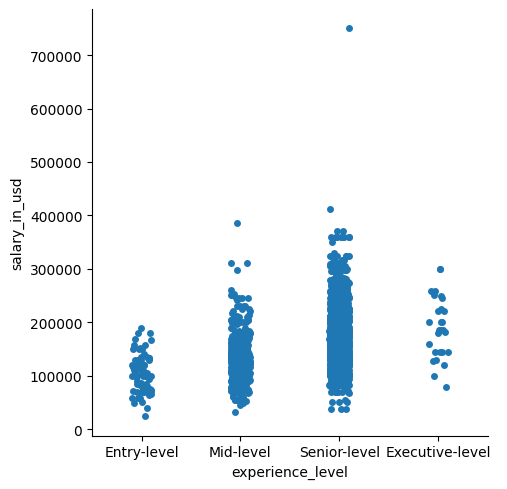

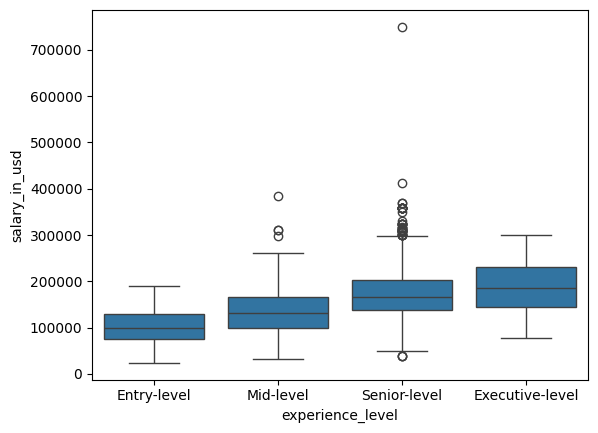

In [70]:
sns.catplot(data=us_data_scientist, y='salary_in_usd', x='experience_level', order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.show()

sns.boxplot(data=us_data_scientist, y='salary_in_usd', x='experience_level', order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.show()

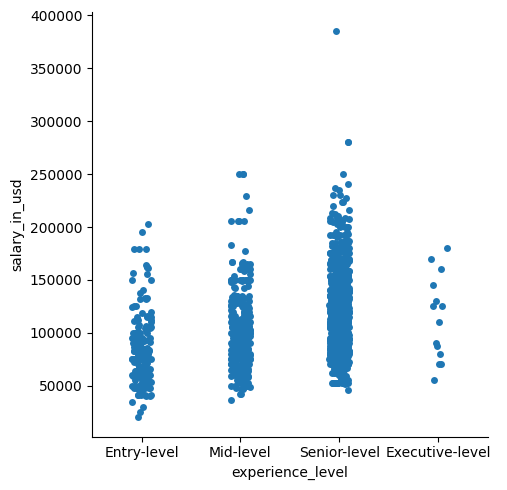

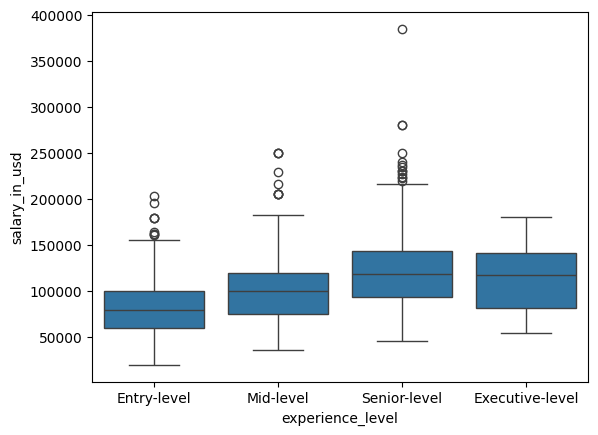

In [71]:
sns.catplot(data=us_data_analyst, y='salary_in_usd', x='experience_level', order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.show()

sns.boxplot(data=us_data_analyst, y='salary_in_usd', x='experience_level', order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'])
plt.show()

- Senior level DS can expect an average salary closer to 200k, meanwhile DA can expect an average around 125k.

## Salaries vs Company size

In [76]:
us_data_scientist.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
Large,71.0,152822.647887,56262.518247,58000.0,111600.0,144000.0,182500.0,412000.0
Medium,1894.0,165826.278775,56389.134665,24000.0,130000.0,160000.0,195000.0,750000.0
Small,11.0,103478.181818,54619.733031,45760.0,68750.0,100000.0,115000.0,240000.0


- Medium size companies seem to be the sweetspot between compensation and job security.

In [77]:
us_data_analyst.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
Large,31.0,96932.774194,48845.420310,25216.0,63000.0,86500.0,113850.0,223100.0
Medium,1404.0,113136.841880,39531.091169,20000.0,85000.0,109140.0,138000.0,385000.0
Small,14.0,80766.000000,32796.541835,30000.0,58000.0,80000.0,108750.0,130000.0


- Similar to DS, the medium companies seem to be the sweet spot.

## **Summary of findings:**

*World data:*

- Average salary of a DS is ~155k compared to a DA of ~108k.
- There's around a $50k difference of salaries in each percentile.
- Average salary of an entry level DS is ~85k compared to ~78k of a DA.
- Overall, for an entry level job, DS and DA can expect a similar salary, even across percentiles.
- Some of the best countries in terms of USD salary are: United Sates, Canada, New Zealand, and Australia.
- There's a visually positive correlation of experience level and salary. However, location and total living costs should be taken into consideration.


*United States data:*
- In the United States, average salary of a DS is ~166k compared to ~112k of a DA.
- In the United States, average salary of an entry level DS is ~104k compared to ~85k of a DA.
- Senior level DS can expect an average salary closer to 200k, meanwhile DA can expect an average around 125k.

Conclusions:

- United States has the highest average salaries of both Data Scientists and Data Analysts. Also, their average salary and entry level salary is also higher compared to the average of the rest of the world. In terms of salary, it's the best destination.

- For Data Scientists, there's a slight advantage in becoming executive-level since the salaries have less variance and have a slight higher average. However, the amount of executive-level jobs is significantly less and senior-level has more salaries > 300k.

- Mid-sized companies seem to be the sweet spot between salary and job security. However, it should be taken with a grain of salt since most of the salaries came from mid-sized companies.